### 참고
- https://anz1217.tistory.com/107

- 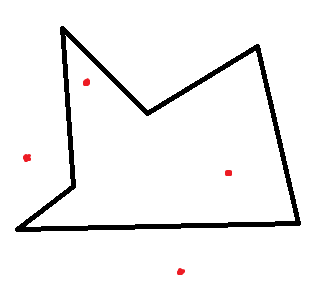
- 어떤 점이 단순 다각형 내부에 있는지 여부를 판단하는 문제

### 볼록 다각형 내부의 점 판정
- 볼록 다각형이 구성돼있을 때 N개의 꼭짓점을 가진 다각형에 대해서 $O(\log N)$만에 구할 수 있다.
- 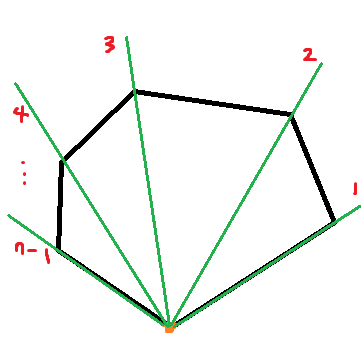
1. 볼록N각형을 구한다. 점들의 정렬성은 당연히 반시계방향.
2. 볼록N각형에서 구하고 싶은 점을 `X`, 볼록N각형에서 기준점을 `O`을 잡고 `X`가 범위 안에 있는지 확인한다.
    - 범위안에 있으려면 CCW($\overrightarrow{OX}$, $\overrightarrow{O1}$)이 시계방향에 있어야 하므로 0보다 작아야 하며\
    CCW($\overrightarrow{OX}$, $\overrightarrow{O(n-1)}$)은 반시계방향에 있어야 하므로 0보다 커야 한다.
3. 만약 `X`가 `2.`의 범위안에 있다면, 이분탐색으로 `X`가 어느 구간에 속하는지 구한다.
4. `X`가 속하는 구간 `A`, `A+1`를 각각 `A`, `B`라고 했을 때, $\overrightarrow{AB}$와 $\overrightarrow{AX}$의 CCW를 통해 `X`가 다각형 내부에 존재하는지 판단할 수 있다.
    - 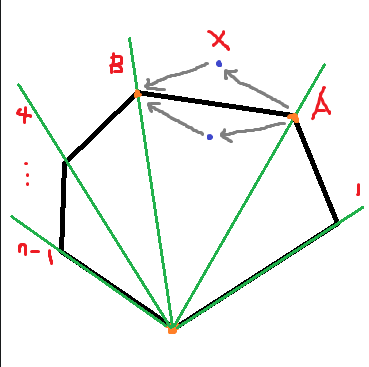
    - CCW($\overrightarrow{AB}$, $\overrightarrow{AX}$)가 0보다 크면 `X`는 `A`의 범위에 있고, 0보다 작으면 `X`는 `B`의 범위에 있다.

### 구현
- 설명은 20670(미스테리 싸인) 참고

In [ ]:
ccw = lambda o, a, b: (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
def inside(L, s) :
  if ccw(L[0], L[1], s) < 0 : return False
  if ccw(L[0], L[-1], s) > 0 : return False

  l, r = 1, len(L) - 1
  while l + 1 < r :
    mid = (l + r) // 2
    if ccw(L[0], L[mid], s) > 0 : l = mid
    else : r = mid

  A, B = l, l+1
  return ccw(L[A], s, L[B]) < 0